# **COVID 19**

dataset=["https://www.kaggle.com/datasets/niketchauhan/covid-19-time-series-data"]

---




### Dataset Description: Daily time series data on COVID-19 cases worldwide.
Columns:
Date: Ranges from 22/01/2020 to the present date.

Country/Region: Nations affected by COVID-19.

Province/State: Specific states or regions within countries.

Latitude and Longitude: Geographic coordinates.

Confirmed cases: Total number of confirmed COVID-19 cases per day.

Recovered cases: Total number of recovery cases per day.

Deaths: Total number of death cases per day.

Objective: Utilize AR model to analyze and predict trends in COVID-19 cases, focusing on confirmed, recovered, and death cases over time.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [2]:
cd=pd.read_csv('/content/time-series-19-covid-combined.csv')
cd

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,NaN,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,NaN,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,NaN,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,NaN,-19.015438,29.154857,8099,7673.0,231


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Province/State  21870 non-null  object 
 3   Lat             72090 non-null  float64
 4   Long            72090 non-null  float64
 5   Confirmed       72090 non-null  int64  
 6   Recovered       68310 non-null  float64
 7   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [4]:
cd.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,72090.000000,72090.000000,7.209000e+04,6.831000e+04,72090.000000
mean,20.961559,23.343773,4.284619e+04,2.760750e+04,1610.020807
std,24.882193,70.429778,3.257632e+05,2.119790e+05,10272.269230
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.428055,-15.310100,1.600000e+01,3.000000e+00,0.000000
50%,22.300000,20.939400,4.400000e+02,2.020000e+02,6.000000
75%,41.153300,80.771797,4.688750e+03,2.150000e+03,89.000000
max,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000


In [5]:
cd.isnull().sum()

Date                  0
Country/Region        0
Province/State    50220
Lat                   0
Long                  0
Confirmed             0
Recovered          3780
Deaths                0
dtype: int64

In [6]:
cd['Date']=pd.to_datetime(cd['Date'])

### **FILTERING DATA**

**.**Data filtered based on the 'Country/Region' column.

**.**Irrelevant columns ('Country/Region', 'Province/State', 'Lat', 'Long') are dropped

**.**The index is set to the 'Date' column for time series analysis.

In [7]:
us_data = cd[cd['Country/Region'] == 'US']
us_data = us_data.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1)
us_data.set_index('Date', inplace=True)
us_cases_data = us_data[['Confirmed']]

india_data = cd[cd['Country/Region'] == 'India']
india_data = india_data.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1)
india_data.set_index('Date', inplace=True)
india_cases_data = india_data[['Confirmed']]

### **TRAIN-TEST SPLIT**

In [8]:
us_train_data = us_cases_data.iloc[:-30]
us_test_data = us_cases_data.iloc[-30:]

india_train_data = india_cases_data.iloc[:-30]
india_test_data = india_cases_data.iloc[-30:]

### **FITTING AR MODEL**
**.**The maximum number of lags is set to 10 **.**

In [9]:
us_model = AutoReg(us_train_data, lags=7)
us_model_fit = us_model.fit()
print(us_model_fit.summary())

us_predictions = us_model_fit.predict(start=len(us_train_data), end=len(us_train_data)+len(us_test_data)-1, dynamic=False)

US Autoregression Model Summary:
                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  240
Model:                     AutoReg(7)   Log Likelihood               -2241.144
Method:               Conditional MLE   S.D. of innovations           3639.879
Date:                Tue, 30 Apr 2024   AIC                           4500.288
Time:                        15:20:54   BIC                           4531.348
Sample:                    01-29-2020   HQIC                          4512.813
                         - 09-17-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          831.0365    406.670      2.044      0.041      33.977    1628.096
Confirmed.L1     1.7672      0.061     28.974      0.000       1.648       1.887
Confirmed.L

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [10]:
india_model = AutoReg(india_train_data, lags=7)
india_model_fit = india_model.fit()
print(india_model_fit.summary())

india_predictions = india_model_fit.predict(start=len(india_train_data), end=len(india_train_data)+len(india_test_data)-1, dynamic=False)

India Autoregression Model Summary:
                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  240
Model:                     AutoReg(7)   Log Likelihood               -2168.168
Method:               Conditional MLE   S.D. of innovations           2661.121
Date:                Tue, 30 Apr 2024   AIC                           4354.336
Time:                        15:20:59   BIC                           4385.395
Sample:                    01-29-2020   HQIC                          4366.860
                         - 09-17-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          269.9291    233.685      1.155      0.248    -188.086     727.944
Confirmed.L1     1.5725      0.058     27.240      0.000       1.459       1.686
Confirme

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


### **METRICS CALCLTN**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

us_mae = mean_absolute_error(us_test_data, us_predictions)
us_mse = mean_squared_error(us_test_data, us_predictions)
us_rmse = us_mse ** 0.5


In [12]:
india_mae = mean_absolute_error(india_test_data, india_predictions)
india_mse = mean_squared_error(india_test_data, india_predictions)
india_rmse = india_mse ** 0.5


In [13]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

### **PLOTTING**

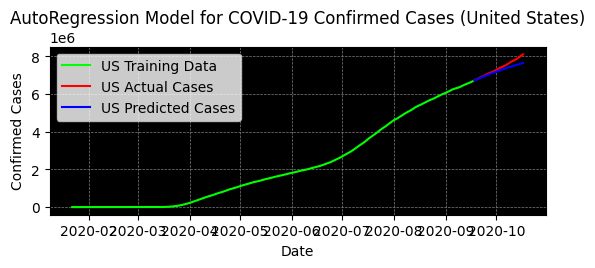

In [17]:
# US #
plt.subplot(2, 1, 1)
plt.plot(us_train_data.index, us_train_data, color='lime', label='US Training Data')
plt.plot(us_test_data.index, us_test_data, color='red', label='US Actual Cases')
plt.plot(us_test_data.index, us_predictions, color='blue', label='US Predicted Cases')
plt.title('AutoRegression Model for COVID-19 Confirmed Cases (United States)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.gca().set_facecolor('black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


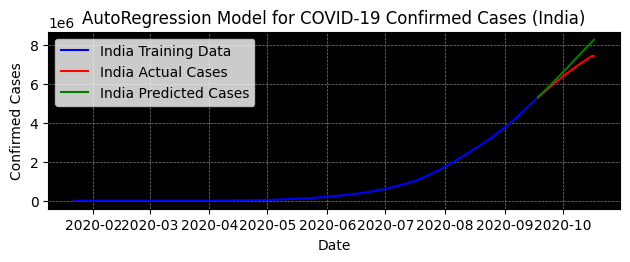

In [18]:
# India #
plt.subplot(2, 1, 2)
plt.plot(india_train_data.index, india_train_data, color='blue', label='India Training Data')
plt.plot(india_test_data.index, india_test_data, color='red', label='India Actual Cases')
plt.plot(india_test_data.index, india_predictions, color='green', label='India Predicted Cases')
plt.title('AutoRegression Model for COVID-19 Confirmed Cases (India)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.gca().set_facecolor('black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [19]:
print("\nMetrics for the Us:")
print("MAE:", us_mae)
print("MSE:", us_mse)
print("RMSE:", us_rmse)
print()
print("Metrics for India:")
print("MAE:", india_mae)
print("MSE:", india_mse)
print("RMSE:", india_rmse)


Metrics for the Us:
MAE: 154509.85684948348
MSE: 40929181262.400764
RMSE: 202309.617325526

Metrics for India:
MAE: 311593.7049854789
MSE: 156005124044.45276
RMSE: 394974.839761285




---

